In [219]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [220]:
unemployment_df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')

In [221]:
unemployment_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [222]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [223]:
unemployment_df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [224]:
# Clean column names by stripping whitespace
unemployment_df.rename(columns=lambda x: x.strip(), inplace=True)

In [225]:
unemployment_df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [226]:
unemployment_df.dropna(inplace=True)

In [227]:
# Calculate the average unemployment rate per region
unemployment_percentage_per_state = unemployment_df.groupby("Region")["Estimated Unemployment Rate (%)"].mean()

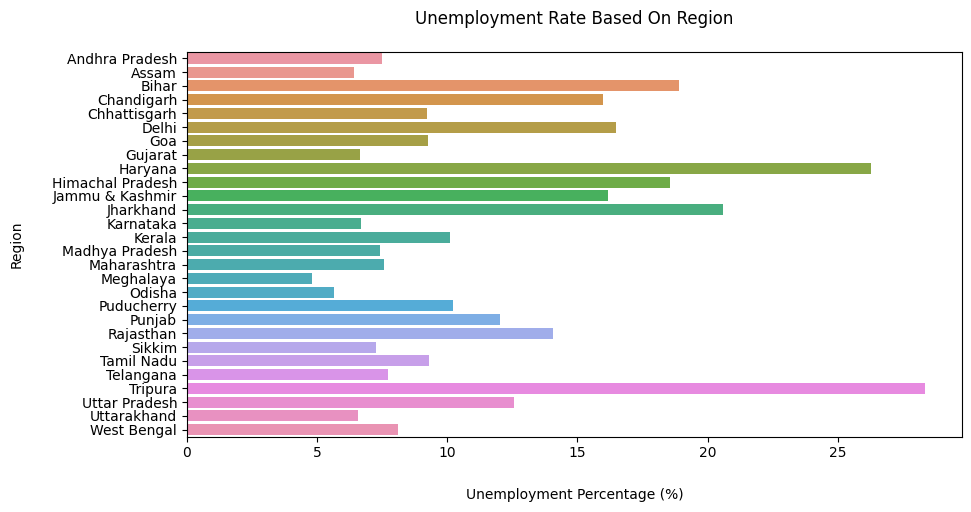

In [228]:
# Visualize the average unemployment rate by region using a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=unemployment_percentage_per_state.values, y=unemployment_percentage_per_state.keys())
plt.title("Unemployment Rate Based On Region", y=1.05)
plt.ylabel("Region", labelpad=20)
plt.xlabel("Unemployment Percentage (%)", labelpad=20)
plt.show()

We can clearly see that **Haryana**, **Tripura**, and **Bihar** have the highest unemployment rates, 
while **Meghalaya**, **Assam**, **Karnataka**, and **Goa** have the lowest unemployment rates in India.

In [229]:
# Count occurrences of each frequency in the dataset
unemployment_df['Frequency'].value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [230]:
# Count occurrences of each area in the dataset
unemployment_df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [231]:
# Calculate the average unemployment rate per area within each region
unemployment_rate_per_area = unemployment_df.groupby(['Region', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

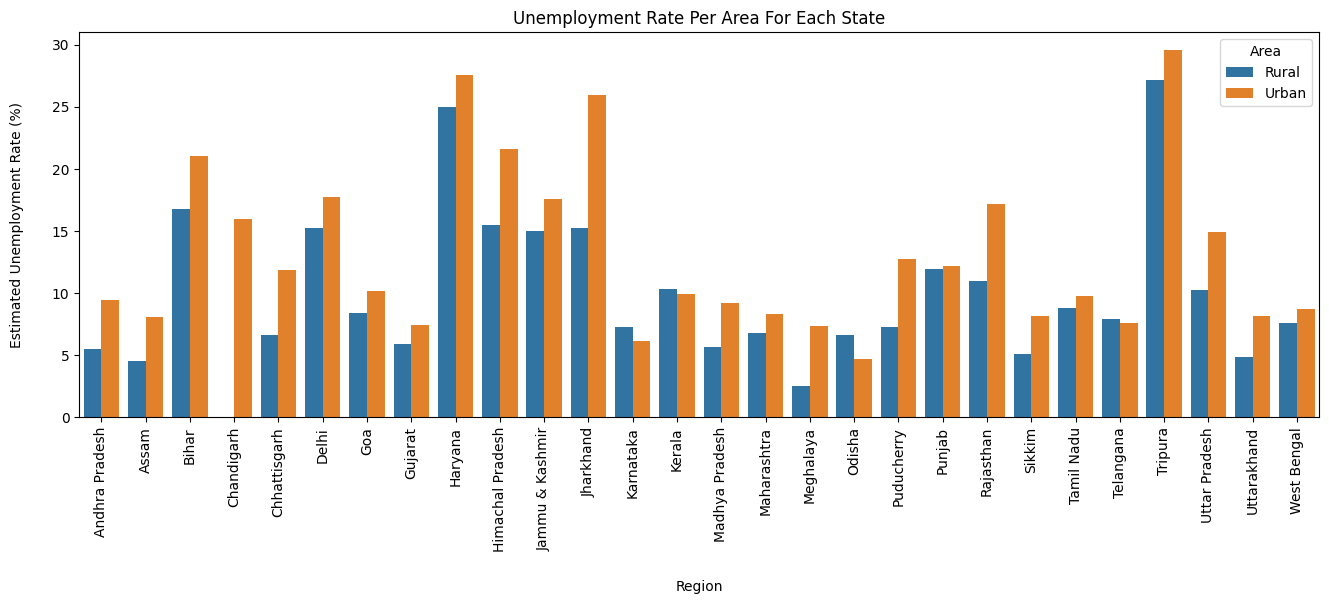

In [232]:
# Visualize the unemployment rate per area for each state using a bar plot
plt.figure(figsize=(16, 5))
sns.barplot(data=unemployment_rate_per_area, x='Region', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title('Unemployment Rate Per Area For Each State')
plt.xlabel("Region", labelpad=20)
plt.ylabel("Estimated Unemployment Rate (%)", labelpad=20)
plt.xticks(rotation=90)
plt.show()

In [233]:
# Clean up the 'Date' column by stripping whitespace
unemployment_df['Date'] = unemployment_df['Date'].apply(lambda x: x.strip())

In [234]:
# Convert the 'Date' column to datetime format
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

In [235]:
# Resample the unemployment rate by month and calculate the mean
unemployment_rate = unemployment_df[['Date', 'Estimated Unemployment Rate (%)']].resample('M', on='Date').mean()

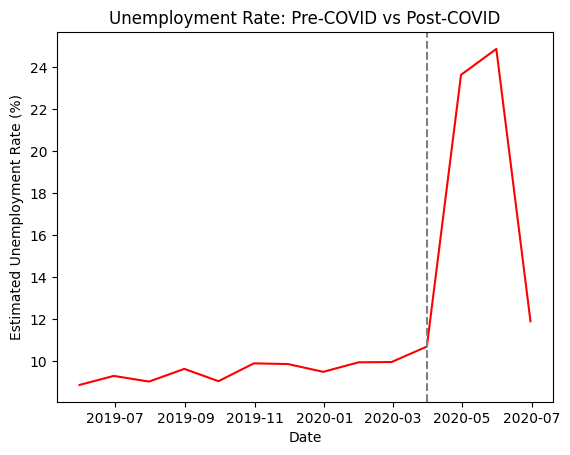

In [236]:
# Plot the monthly unemployment rate with a line indicating the start of COVID
plt.plot(unemployment_rate, c='red')
plt.title('Unemployment Rate: Pre-COVID vs Post-COVID')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.axvline(x=pd.to_datetime('2020-03-31'), color='grey', linestyle='--', label='COVID Start')
plt.show()

We can detect a sharp rise in the unemployment rate at the beginning of the **COVID period (April 2020)**.

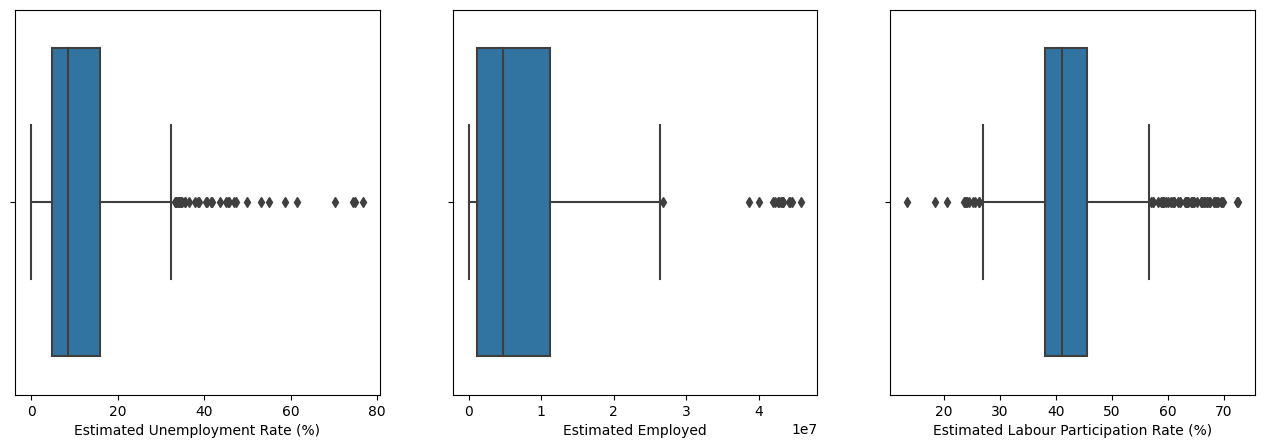

In [237]:
# Define numerical columns for visualization
num_cols = ["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"]

# Create boxplots for numerical columns to visualize their distributions
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
for i in range(3):
    sns.boxplot(data=unemployment_df, x=num_cols[i], ax=ax[i])
plt.show()

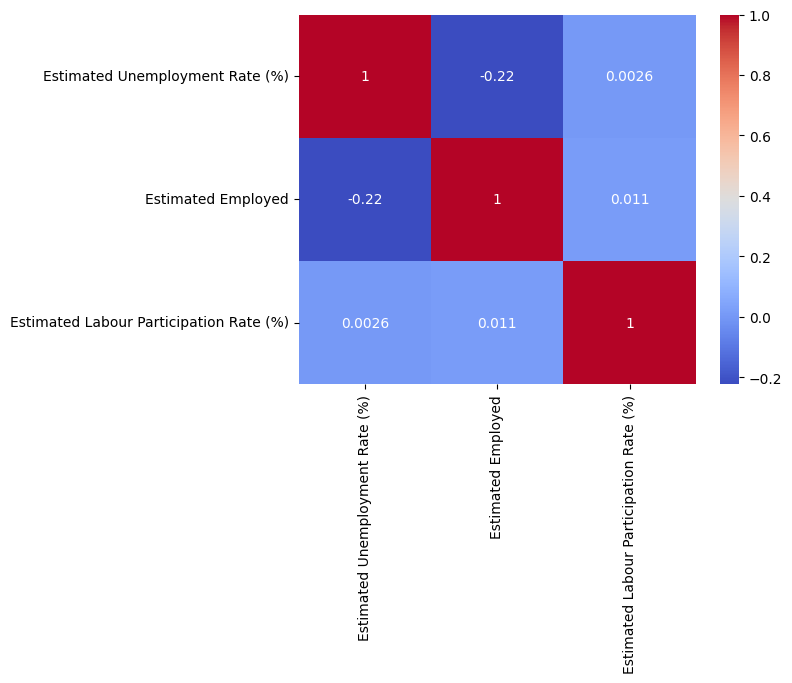

In [238]:
# Calculate the correlation matrix for numeric columns and visualize it using a heatmap
unemp_corr = unemployment_df.corr(numeric_only=True)
sns.heatmap(unemp_corr, annot=True, cmap='coolwarm')
plt.show()

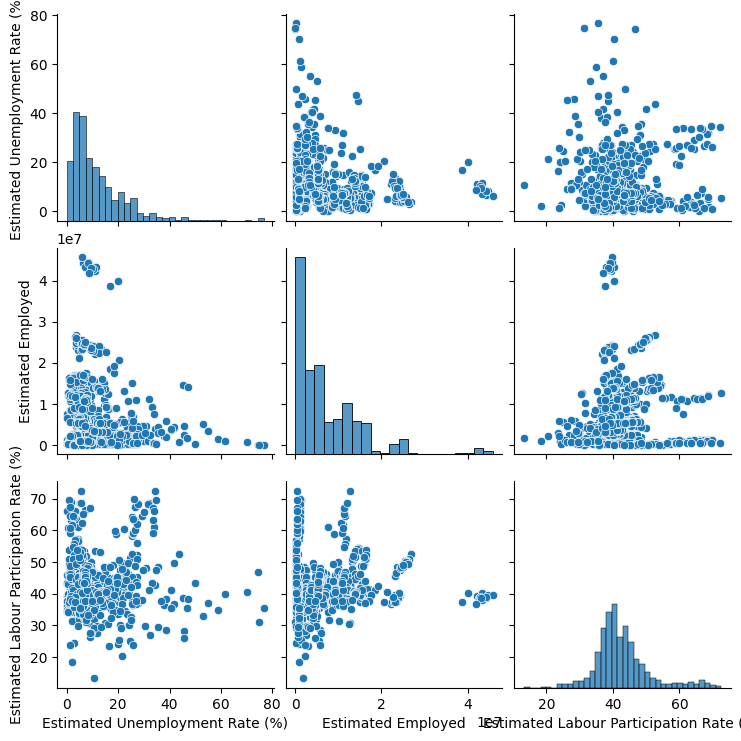

In [239]:
# Create a pairplot to visualize relationships between all numeric columns
sns.pairplot(unemployment_df, palette='Paired')
plt.show()